In [8]:
# Design:  lpf(butter), hpf(cheby), bpf(butter)

TransferFunctionContinuous(
array([1.55854546e+11]),
array([1.00000000e+00, 1.64187544e+03, 1.34787749e+06, 6.48186445e+08,
       1.55854546e+11]),
dt: None
)


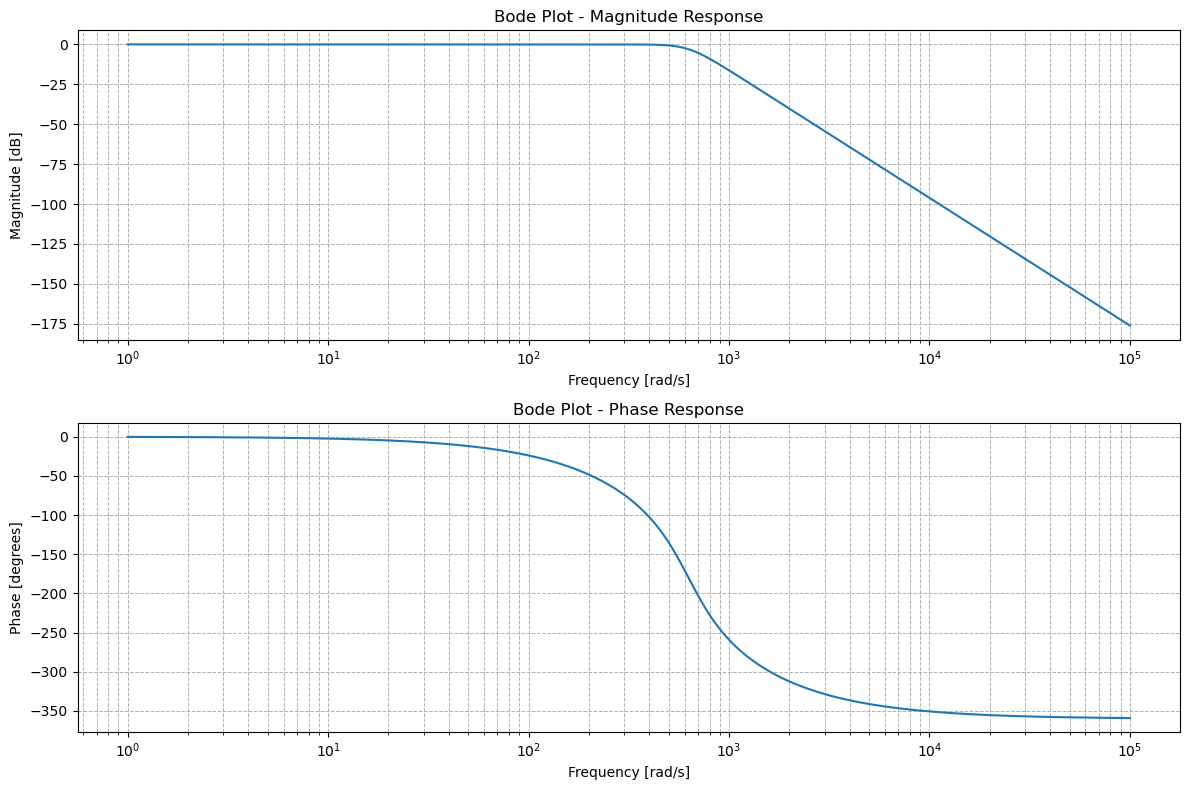

In [42]:
# butterworth low pass filter cutoff: 100Hz
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import zpk2tf, bode, TransferFunction, buttap, ellipap, cheb1ap, lp2lp, lp2bp, lp2bs, lp2hp

# filter specification
order = 40
cutoff_freq_hz = 100  # Cutoff frequency in Hz
cutoff_freq_rad = 2 * np.pi * cutoff_freq_hz  # Convert to rad/s

z, p, k = buttap(4)  # 4th order Butterworth filter
num, denom = zpk2tf(z, p, k) # get tf
num, denom = lp2lp(num, denom, cutoff_freq_rad) # DENORMALIZED TO CUTOFF FREQ FOR TRANSFER FUNCTION

filterTF = TransferFunction(num,denom)
print(filterTF)

# frequency vector
w_log = np.logspace(0,5,1000) # from 10e-1 to 10e3, with 1000 points

# Compute the Bode plot
w_log, mag, phase = bode(filterTF, w=w_log)

# Plot the Bode magnitude and phase
plt.figure(figsize=(12, 8))

# Magnitude plot
plt.subplot(2, 1, 1) # 2 rows, 1 column, 1st subplot
plt.semilogx(w_log, mag)  # Bode magnitude plot (logarithmic x-axis)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.title('Bode Plot - Magnitude Response')

# Phase plot
plt.subplot(2, 1, 2) # 2 rows, 1 column, 2nd subplot
plt.semilogx(w_log, phase)  # Bode phase plot (logarithmic x-axis)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.title('Bode Plot - Phase Response')

# Show plots
plt.tight_layout()
plt.show()

TransferFunctionContinuous(
array([0.89125094, 0.        , 0.        , 0.        , 0.        ]),
array([1.00000000e+00, 1.69286945e+02, 2.08247116e+04, 8.57479735e+05,
       5.65453372e+07]),
dt: None
)


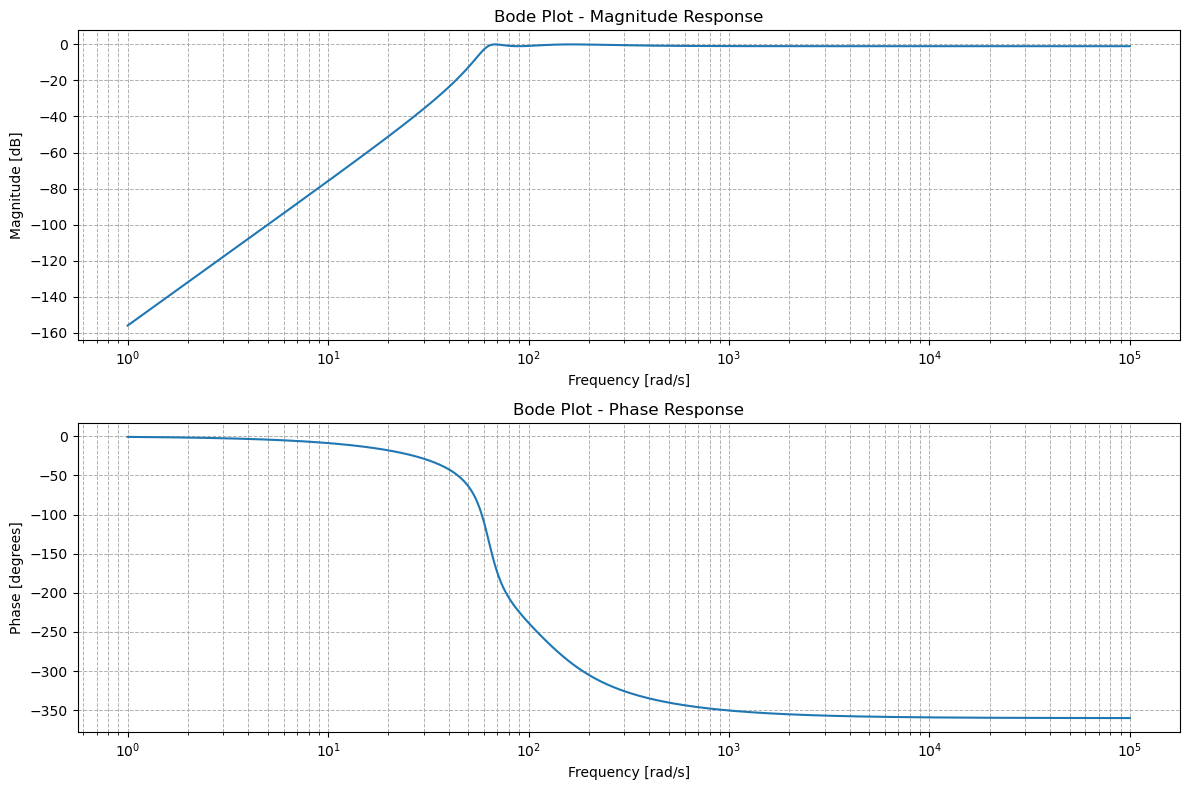

In [17]:
# hpf(cheby) cutoff: 10 Hz
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import zpk2tf, bode, TransferFunction, buttap, ellipap, cheb1ap, lp2lp, lp2bp, lp2bs, lp2hp

# Filter specification
order = 4
rp = 1  # Passband ripple in dB
cutoff_freq_hz = 10  # Cutoff frequency in Hz
cutoff_freq_rad = 2 * np.pi * cutoff_freq_hz  # Convert to rad/s

# Get normalized Chebyshev Type I filter (cutoff at 1 rad/s)
z, p, k = cheb1ap(order, rp)

# Scale the filter to the desired cutoff frequency
num, denom = zpk2tf(z, p, k)
num, denom = lp2hp(num, denom, cutoff_freq_rad)


filterTF = TransferFunction(num, denom)
print(filterTF)

# Frequency vector for Bode plot
w_log = np.logspace(0, 5, 1000)  # from 10^-1 to 10^2 rad/s, with 1000 points

# Compute the Bode plot
w_log, mag, phase = bode(filterTF, w=w_log)
# mag = 10**(mag/20)  # mag in linear scale

# Plot the Bode magnitude and phase
plt.figure(figsize=(12, 8))

# Magnitude plot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.semilogx(w_log, mag)  # Bode magnitude plot (logarithmic x-axis)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.title('Bode Plot - Magnitude Response')

# Phase plot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.semilogx(w_log, phase)  # Bode phase plot (logarithmic x-axis)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.title('Bode Plot - Phase Response')

# Show plots
plt.tight_layout()
plt.show()

TransferFunctionContinuous(
array([2.49367273e+20, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00]),
array([1.00000000e+00, 3.28375089e+05, 5.45467542e+10, 5.34105630e+15,
       2.66544756e+20, 8.43425805e+23, 1.36021753e+27, 1.29309189e+30,
       6.21840369e+32]),
dt: None
)


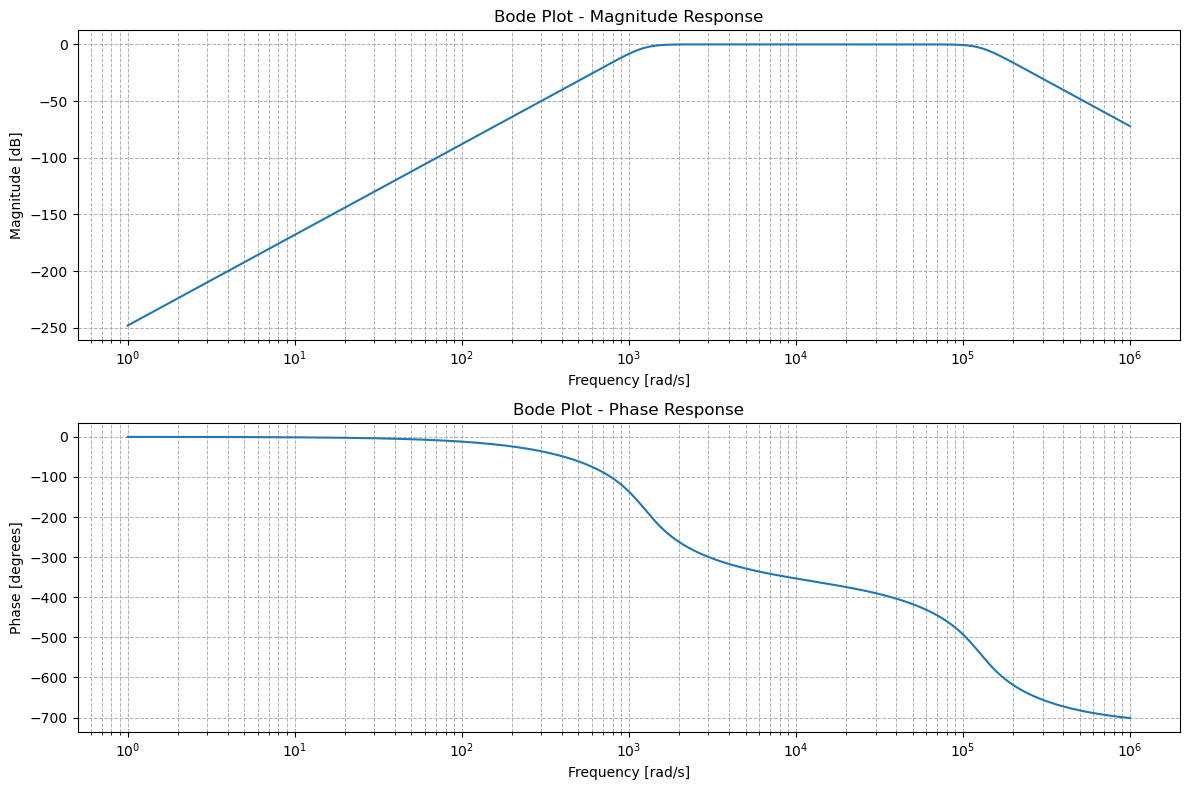

In [34]:
# bpf(butter) passband: 200 hz to 20 khz
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import zpk2tf, bode, TransferFunction, buttap, ellipap, cheb1ap, lp2lp, lp2bp, lp2bs, lp2hp

# filter specification
order = 4
lower_cutoff_freq_hz = 2000  # Lower cutoff frequency in Hz
upper_cutoff_freq_hz = 20000  # Upper cutoff frequency in Hz

lower_cutoff_freq_rad = 2 * np.pi * lower_cutoff_freq_hz  # Convert to rad/s
upper_cutoff_freq_rad = 2 * np.pi * upper_cutoff_freq_hz  # Convert to rad/s


z, p, k = buttap(4)  # 4th order Butterworth filter
num, denom = zpk2tf(z, p, k) # get tf
num, denom = lp2bp(num, denom, lower_cutoff_freq_rad, upper_cutoff_freq_rad) # DENORMALIZED TO CUTOFF FREQ FOR TRANSFER FUNCTION


filterTF = TransferFunction(num,denom)
print(filterTF)

# frequency vector
w_log = np.logspace(0,6,1000) # from 10e-1 to 10e3, with 1000 points

# Compute the Bode plot
w_log, mag, phase = bode(filterTF, w=w_log)
# mag = 10**(mag/20) # mag in linear scale


# Plot the Bode magnitude and phase
plt.figure(figsize=(12, 8))

# Magnitude plot
plt.subplot(2, 1, 1) # 2 rows, 1 column, 1st subplot
plt.semilogx(w_log, mag)  # Bode magnitude plot (logarithmic x-axis)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.title('Bode Plot - Magnitude Response')

# Phase plot
plt.subplot(2, 1, 2) # 2 rows, 1 column, 2nd subplot
plt.semilogx(w_log, phase)  # Bode phase plot (logarithmic x-axis)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.title('Bode Plot - Phase Response')

# Show plots
plt.tight_layout()
plt.show()


TransferFunctionContinuous(
array([9.7409091e+13, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00]),
array([1.00000000e+00, 8.20937722e+03, 3.52760739e+07, 9.07461022e+10,
       1.24950253e+14, 3.58251252e+16, 5.49793647e+18, 5.05114019e+20,
       2.42906394e+22]),
dt: None
)


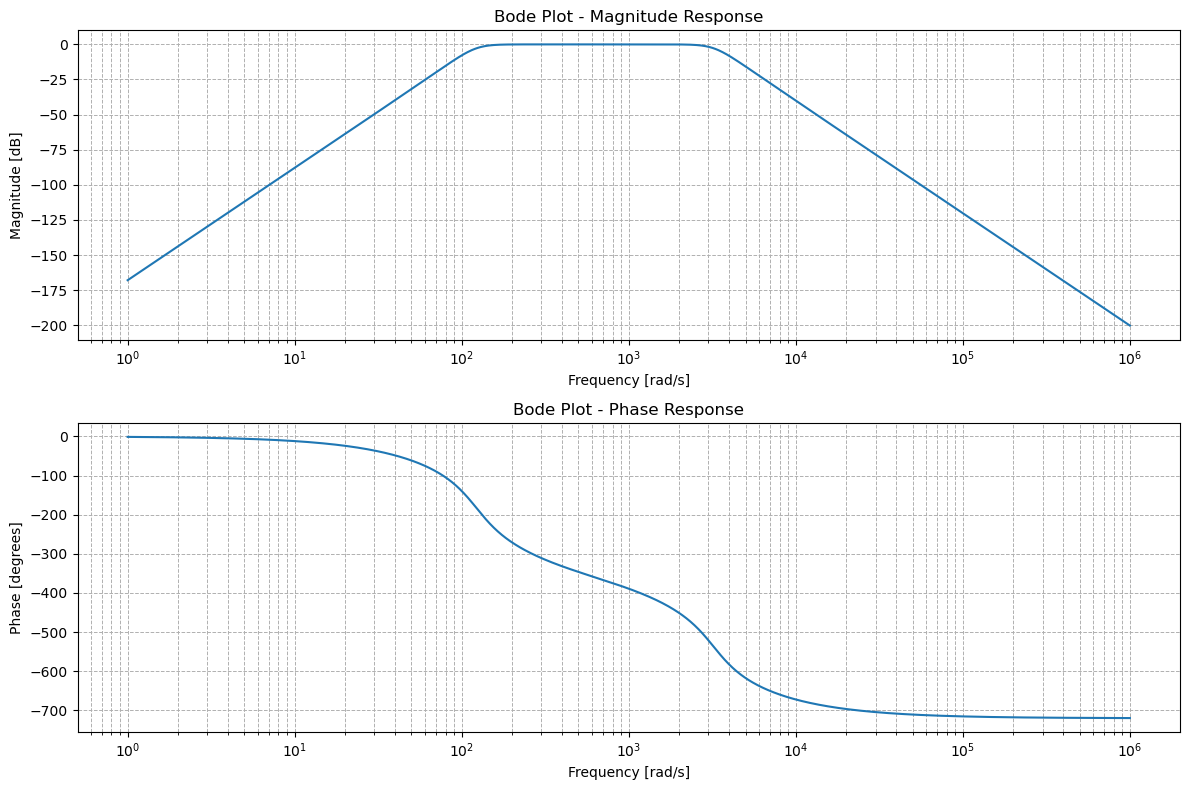

In [36]:
# bpf(butter) pass band filter:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import zpk2tf, bode, TransferFunction, buttap, ellipap, cheb1ap, lp2lp, lp2bp, lp2bs, lp2hp

# filter specification
order = 4
lower_cutoff_freq_hz = 100  # Lower cutoff frequency in Hz
upper_cutoff_freq_hz = 500  # Upper cutoff frequency in Hz

lower_cutoff_freq_rad = 2 * np.pi * lower_cutoff_freq_hz  # Convert to rad/s
upper_cutoff_freq_rad = 2 * np.pi * upper_cutoff_freq_hz  # Convert to rad/s


z, p, k = buttap(4)  # 4th order Butterworth filter
num, denom = zpk2tf(z, p, k) # get tf
num, denom = lp2bp(num, denom, lower_cutoff_freq_rad, upper_cutoff_freq_rad) # DENORMALIZED TO CUTOFF FREQ FOR TRANSFER FUNCTION


filterTF = TransferFunction(num,denom)
print(filterTF)

# frequency vector
w_log = np.logspace(0,6,1000) # from 10e-1 to 10e3, with 1000 points

# Compute the Bode plot
w_log, mag, phase = bode(filterTF, w=w_log)
# mag = 10**(mag/20) # mag in linear scale


# Plot the Bode magnitude and phase
plt.figure(figsize=(12, 8))

# Magnitude plot
plt.subplot(2, 1, 1) # 2 rows, 1 column, 1st subplot
plt.semilogx(w_log, mag)  # Bode magnitude plot (logarithmic x-axis)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.title('Bode Plot - Magnitude Response')

# Phase plot
plt.subplot(2, 1, 2) # 2 rows, 1 column, 2nd subplot
plt.semilogx(w_log, phase)  # Bode phase plot (logarithmic x-axis)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.title('Bode Plot - Phase Response')

# Show plots
plt.tight_layout()
plt.show()


TransferFunctionContinuous(
array([1.00000000e-02, 0.00000000e+00, 5.92898876e+04, 0.00000000e+00,
       5.01785030e+10]),
array([1.00000000e+00, 5.90081403e+02, 5.97594861e+05, 1.99357008e+08,
       5.63012063e+10]),
dt: None
)


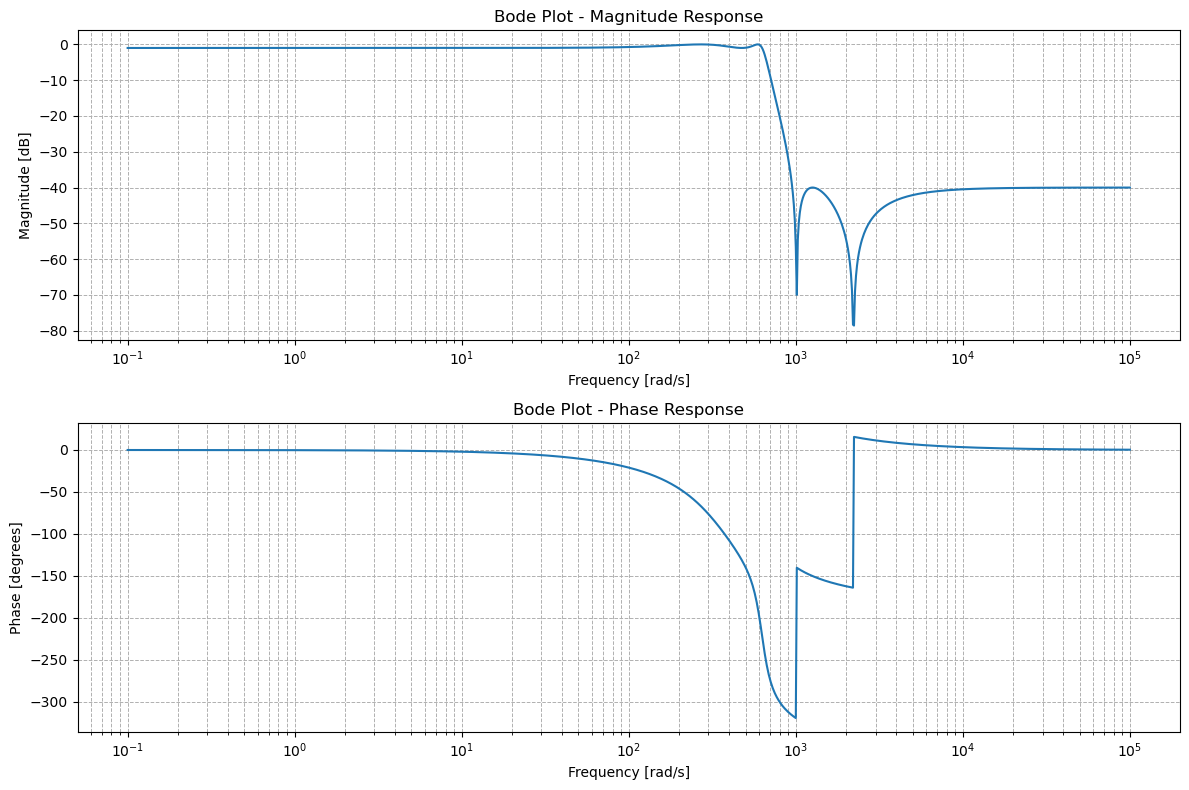

In [38]:
# ELLIPTIC FILTER  LOW PASS 100HZ
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import zpk2tf, bode, TransferFunction, buttap, ellipap, cheb1ap, lp2lp, lp2bp, lp2bs, lp2hp
# Filter specification
order = 4
cutoff_freq_hz = 100  # Cutoff frequency in Hz
cutoff_freq_rad = 2 * np.pi * cutoff_freq_hz  # Convert to rad/s
rp = 1  # Passband ripple in dB
rs = 40  # Stopband attenuation in dB

# Get normalized Elliptic filter (cutoff at 1 rad/s)
z, p, k = ellipap(order, rp, rs)

# Scale the filter to the desired cutoff frequency
num, denom = zpk2tf(z, p, k)
num, denom = lp2lp(num, denom, cutoff_freq_rad)

filterTF = TransferFunction(num, denom)
print(filterTF)

# Frequency vector for Bode plot
w_log = np.logspace(-1, 5, 1000)  # from 10^-1 to 10^2 rad/s, with 1000 points

# Compute the Bode plot
w_log, mag, phase = bode(filterTF, w=w_log)
# mag = 10**(mag/20)  # mag in linear scale

# Plot the Bode magnitude and phase
plt.figure(figsize=(12, 8))

# Magnitude plot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.semilogx(w_log, mag)  # Bode magnitude plot (logarithmic x-axis)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.title('Bode Plot - Magnitude Response')

# Phase plot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.semilogx(w_log, phase)  # Bode phase plot (logarithmic x-axis)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.title('Bode Plot - Phase Response')

# Show plots
plt.tight_layout()
plt.show()


TransferFunctionContinuous(
array([1.00000000e+00, 0.00000000e+00, 1.57913670e+06, 0.00000000e+00,
       9.35127274e+11, 0.00000000e+00, 2.46115634e+17, 0.00000000e+00,
       2.42906394e+22]),
array([1.00000000e+00, 8.20937722e+03, 3.52760739e+07, 9.07461022e+10,
       1.24950253e+14, 3.58251252e+16, 5.49793647e+18, 5.05114019e+20,
       2.42906394e+22]),
dt: None
)


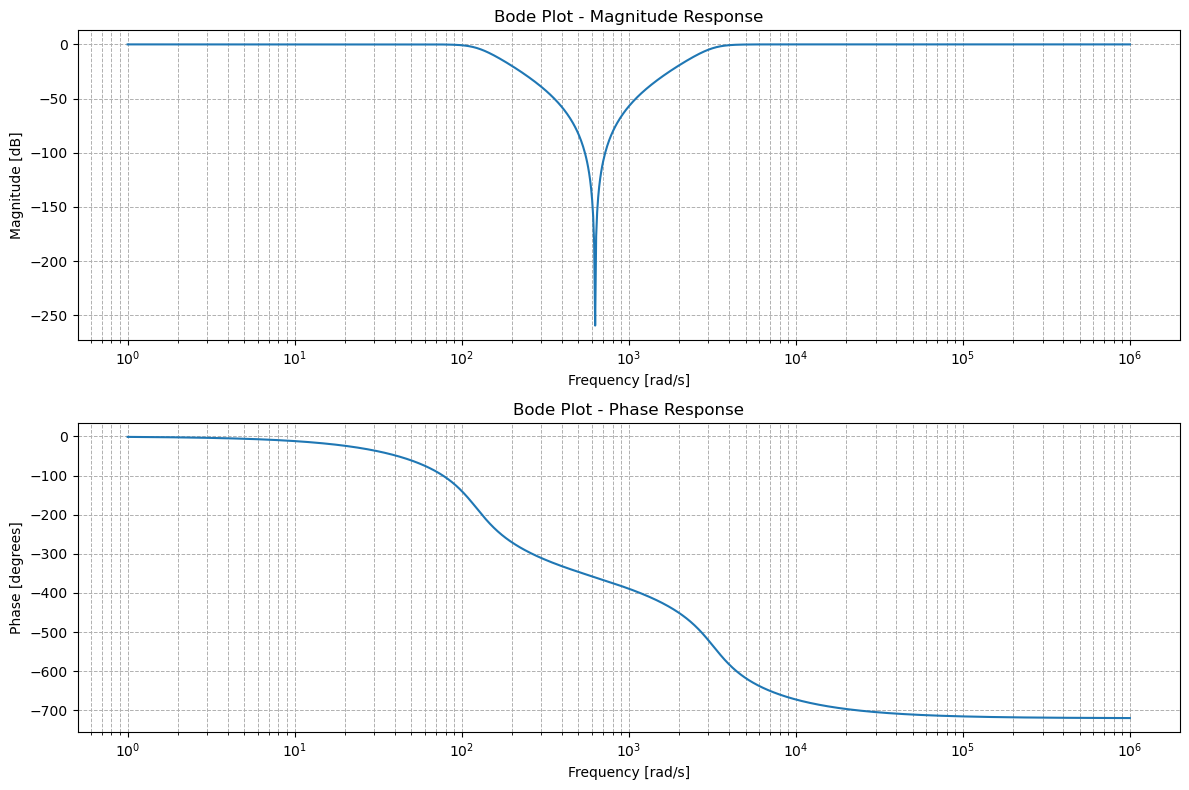

In [40]:
# bpf(butter) reject/stop band filter:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import zpk2tf, bode, TransferFunction, buttap, ellipap, cheb1ap, lp2lp, lp2bp, lp2bs, lp2hp

# filter specification
order = 4
lower_cutoff_freq_hz = 100  # Lower cutoff frequency in Hz
upper_cutoff_freq_hz = 500  # Upper cutoff frequency in Hz

lower_cutoff_freq_rad = 2 * np.pi * lower_cutoff_freq_hz  # Convert to rad/s
upper_cutoff_freq_rad = 2 * np.pi * upper_cutoff_freq_hz  # Convert to rad/s


z, p, k = buttap(4)  # 4th order Butterworth filter
num, denom = zpk2tf(z, p, k) # get tf
num, denom = lp2bs(num, denom, lower_cutoff_freq_rad, upper_cutoff_freq_rad) # DENORMALIZED TO CUTOFF FREQ FOR TRANSFER FUNCTION


filterTF = TransferFunction(num,denom)
print(filterTF)

# frequency vector
w_log = np.logspace(0,6,1000) # from 10e-1 to 10e3, with 1000 points

# Compute the Bode plot
w_log, mag, phase = bode(filterTF, w=w_log)
# mag = 10**(mag/20) # mag in linear scale


# Plot the Bode magnitude and phase
plt.figure(figsize=(12, 8))

# Magnitude plot
plt.subplot(2, 1, 1) # 2 rows, 1 column, 1st subplot
plt.semilogx(w_log, mag)  # Bode magnitude plot (logarithmic x-axis)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Magnitude [dB]')
plt.title('Bode Plot - Magnitude Response')

# Phase plot
plt.subplot(2, 1, 2) # 2 rows, 1 column, 2nd subplot
plt.semilogx(w_log, phase)  # Bode phase plot (logarithmic x-axis)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xlabel('Frequency [rad/s]')
plt.ylabel('Phase [degrees]')
plt.title('Bode Plot - Phase Response')

# Show plots
plt.tight_layout()
plt.show()
